In [2]:
from sklearn.datasets import load_wine
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
wine=load_wine()
svc=SVC(kernel='linear')
scores=cross_val_score(svc,wine.data,wine.target)
print('cross validation accuracy:{}'.format(scores))

cross validation accuracy:[0.88888889 0.94444444 0.97222222 1.         1.        ]


In [3]:
print('cross validation average accuracy:{:.3f}'.format(scores.mean()))

cross validation average accuracy:0.961


In [6]:
scores=cross_val_score(svc,wine.data,wine.target,cv=10)
print('cross validation accuracy:{}'.format(scores))

cross validation accuracy:[0.88888889 0.94444444 0.88888889 0.94444444 0.94444444 0.94444444
 1.         1.         1.         1.        ]


In [7]:
print('cross validation average accuracy:{:.3f}'.format(scores.mean()))

cross validation average accuracy:0.956


In [8]:
from sklearn.model_selection import ShuffleSplit
shuffle_split=ShuffleSplit(test_size=.2,train_size=.7,n_splits=10)
scores=cross_val_score(svc,wine.data,wine.target,cv=shuffle_split)
print('accuracy shuffle split:{}'.format(scores))

accuracy shuffle split:[0.88888889 0.91666667 0.97222222 1.         0.94444444 0.91666667
 0.97222222 1.         1.         0.97222222]


In [9]:
from sklearn.model_selection import LeaveOneOut
cv=LeaveOneOut()
scores=cross_val_score(svc,wine.data,wine.target,cv=cv)
print('cv:{}'.format(len(scores)))
print('average accuracy:{}'.format(scores.mean()))

cv:178
average accuracy:0.9550561797752809


In [11]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(wine.data,wine.target,random_state=38)
best_score=0
for alpha in [0.01,0.1,1.0,10.0]:
    for max_iter in [100,1000,5000,10000]:
        lasso=Lasso(alpha=alpha,max_iter=max_iter)
        lasso.fit(X_train,y_train)
        score=lasso.score(X_test,y_test)
        if score>best_score:
            best_score=score
            best_parameters={'alpha':alpha,'max_iter':max_iter}
print('best score:{:.3f}'.format(best_score))
print('best parameters:{}'.format(best_parameters))

best score:0.889
best parameters:{'alpha': 0.01, 'max_iter': 100}


In [12]:
import numpy as np
for alpha in [0.01,0.1,1.0,10.0]:
    for max_iter in [100,1000,5000,10000]:
        lasso=Lasso(alpha=alpha,max_iter=max_iter)
        scores=cross_val_score(lasso,X_train,y_train,cv=6)
        score=np.mean(scores)
        if score>best_score:
            best_score=score
            best_parameters={'alpha':alpha,'max_iter':max_iter}
print('best score:{:.3f}'.format(best_score))
print('best parameters:{}'.format(best_parameters))   

best score:0.889
best parameters:{'alpha': 0.01, 'max_iter': 100}


In [13]:
lasso=Lasso(alpha=0.01,max_iter=100).fit(X_train,y_train)
print('test data score:{:.3f}'.format(lasso.score(X_test,y_test)))

test data score:0.889


In [15]:
from sklearn.model_selection import GridSearchCV
params={'alpha':[0.01,0.1,1.0,10.0],'max_iter': [100,1000,5000,10000]}
grid_search=GridSearchCV(lasso,params,cv=6)
grid_search.fit(X_train,y_train)
print('best score:{:.3f}'.format(grid_search.score(X_test,y_test)))
print('best parameters:{}'.format(grid_search.best_params_))

best score:0.889
best parameters:{'alpha': 0.01, 'max_iter': 100}


In [16]:
print('best score:{:.3f}'.format(grid_search.best_score_))

best score:0.853


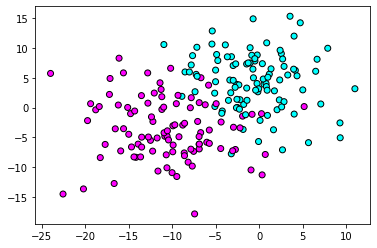

In [17]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
X,y=make_blobs(n_samples=200,random_state=1,centers=2,cluster_std=5)
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.cool,edgecolor='k')
plt.show()

In [18]:
from sklearn.naive_bayes import GaussianNB
X_train,X_test,y_train,y_test =train_test_split(X,y,random_state=68)
gnb=GaussianNB()
gnb.fit(X_train,y_train)
predict_proba=gnb.predict_proba(X_test)
print('accuracy shape:{}'.format(predict_proba.shape))

accuracy shape:(50, 2)


In [19]:
print(predict_proba[:5])

[[0.98849996 0.01150004]
 [0.0495985  0.9504015 ]
 [0.01648034 0.98351966]
 [0.8168274  0.1831726 ]
 [0.00282471 0.99717529]]


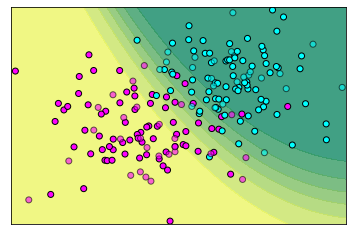

In [23]:
x_min,x_max=X[:,0].min()-.5,X[:,0].max()+.5
y_min,y_max=X[:,1].min()-.5,X[:,1].max()+.5
xx,yy=np.meshgrid(np.arange(x_min,x_max,0.2),np.arange(y_min,y_max,0.2))
Z=gnb.predict_proba(np.c_[xx.ravel(),yy.ravel()])[:,1]
Z=Z.reshape(xx.shape)
plt.contourf(xx,yy,Z,cmap=plt.cm.summer,alpha=0.8)
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap=plt.cm.cool,edgecolor='k')
plt.scatter(X_test[:,0],X_test[:,1],c=y_test,cmap=plt.cm.cool,edgecolor='k',alpha=0.6)
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.xticks(())
plt.yticks(())
plt.show()

In [24]:
from sklearn.svm import SVC
svc=SVC().fit(X_train,y_train)
dec_func=svc.decision_function(X_test)
print(dec_func[:5])

[-1.36071347  1.53694862  1.78825594 -0.96133081  1.81826853]


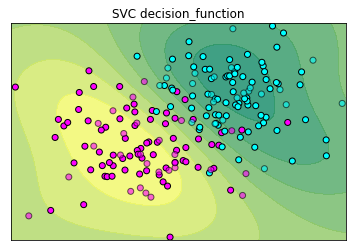

In [27]:
Z=svc.decision_function(np.c_[xx.ravel(),yy.ravel()])
Z=Z.reshape(xx.shape)
plt.contourf(xx,yy,Z,cmap=plt.cm.summer,alpha=0.8)
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap=plt.cm.cool,edgecolor='k')
plt.scatter(X_test[:,0],X_test[:,1],c=y_test,cmap=plt.cm.cool,edgecolor='k',alpha=0.6)
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.title('SVC decision_function')
plt.xticks(())
plt.yticks(())
plt.show()